# Εργασία: Πρόβλεψη Ακμών στον Ελληνικό Ιστό

Στα πλαίσια της εργασίας του μαθήματος Εφαρμογές στον Παγκόσμιο Ιστό, θα δουλέψετε πάνω σε ένα υποσύνολο του Ελληνικού Διαδικτύου. Συγκεκριμένα, σας δίνεται ο κατευθυνόμενος γράφος ο οποίος αναπαριστά το παραπάνω υποσύνολο όπως επίσης και το κείμενο κάποιων σελίδων για κάθε κόμβο του γράφου. Από το γράφο αυτό έχει αφαιρεθεί ένα σύνολο ακμών και στόχος σας είναι να προβλέψετε ποιές είναι οι ακμές που έχουν αφαιρεθεί.  

### Σύνολο Δεδομένων

Για να αποκτήσετε πρόσβαση στο σύνολο δεδομένων, θα πρέπει πρώτα να πάτε στη σελίδα http://195.251.252.9/challengePostgrad/index.php και να δημιουργήστε ένα λογαριασμό. Αφού δημιουργήσετε τον προσωπικό σας λογαριασμό και συνδεθείτε, μπορείτε πλέον από την κεντρική οθόνη να κατεβάσετε το σύνολο δεδομένων (165 MB). Το αρχείο που θα κατεβάσετε είναι συμπιεσμένο και θα πρέπει να το αποσυμπιέσετε. Αφού το αποσυμπιέσετε, θα δείτε ότι αποτελείται από ένα αρχέιο και ένα φάκελο. Το αρχείο με όνομα `edgelist.txt` περιέχει μια λίστα των ακμών του γράφου. Δώστε προσοχή στο γεγονός ότι ο γράφος είναι **κατευθυνόμενος**. Οι κόμβοι του γράφου αντιστοιχούν σε URLs του ελληνικού διαδικτύου, ενώ δυο κόμβοι συνδέονται μεταξύ τους με μια κατευθυνόμενη ακμή αν κάποια σελίδα του πρώτου URL περιέχει έναν ή περισσότερους συνδέσμους πρός κάποια σελίδα του δεύτερου URL. Για παράδειγμα, μπορείτε παρακάτω να δείτε τις 4 πρώτες ακμές της λίστας.
``` html
politikanet.gr	frontpages.gr
fiat.gr	fiatprofessional.gr
dete.gr	deliveras.gr
dete.gr	parapolitika.gr
.
.
.
```
Για παράδειγμα, η πρώτη γραμμή μας λέει ότι μια ή περισσότερες σελίδες του URL politikanet.gr έχει σύνδεσμο προς μια ή περισσότερες σελίδες του URL frontpages.gr. Ο γράφος που σας δίνεται περιέχει 2041 κόμβους και 2683 κατευθυνόμενες ακμές. Τρέχοντας τον παρακάτω κώδικα μπορείτε να δείτε την κατανομή βαθμών εισόδου των κόμβων του γράφου.

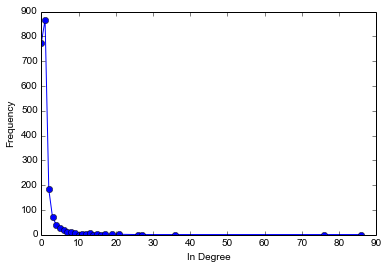

In [4]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

G = nx.read_edgelist('dataset/edgelist.txt', delimiter='\t', create_using=nx.DiGraph())

indeg_vals = sorted(set(G.in_degree().values()))
indeg_hist = [G.in_degree().values().count(x) for x in indeg_vals]

plt.plot(indeg_vals, indeg_hist, 'b-',marker='o')
plt.ylabel("Frequency")
plt.xlabel("In Degree")

Αντίστοιχα, με τον παρακάτω κώδικα μπορείτε να δείτε την κατανομή βαθμών εξόδου των κόμβων του γράφου.

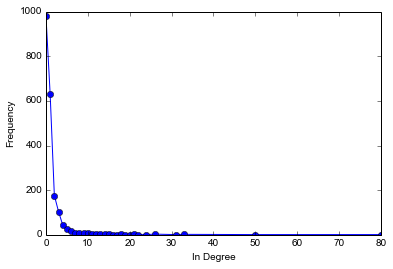

In [5]:
outdeg_vals = sorted(set(G.out_degree().values()))
outdeg_hist = [G.out_degree().values().count(x) for x in outdeg_vals]

plt.plot(outdeg_vals, outdeg_hist, 'b-',marker='o')
plt.ylabel("Frequency")
plt.xlabel("In Degree")

Εκτός από το αρχείο `edgelist.txt`, μετά την αποσυμπίεση του συνόλου δεδομένων θα πρέπει να υπάρχει και ένας φάκελος με το όνομα `hosts`. Ο φάκελος αυτός περιέχει αρχεία με επεξεργασμένο κείμενο από διάφορες σελίδες κάθε URL. Τα αρχεία αυτά είναι συμπιεσμένα. Συγκεκριμένα, υπάρχει ένα μοναδικό συμπιεσμένο αρχείο για κάθε κόμβο του γράφου. Για παράδειγμα, για τον κόμβο `apergia.gr` υπάρχει ένα συμπιεσμένο αρχείο με όνομα `apergia.gr.zip` το οποίο περιέχει δυο αρχεία με κείμενο που αντιστοιχούν σε υποσελίδες του παραπάνω URL. Θα πρέπει να διαβάσετε το κείμενο από τα παραπάνω αρχεία και να το χειριστείτε με τέτοιο τρόπο ώστε να σας βοηθήσει στην επίλυση του προβλήματος που καλείστε να αντιμετωπίσετε. Ο παρακάτω κώδικας δημιουργεί ένα λεξικό για την αποθήκευση του κειμένου κάθε URL. Στη συνέχεια, ανοίγει ένα-ένα τα συμπιεσμένα αρχεία στο φάκελο `hosts` και διαβάζει ένα-ένα τα αρχεία κειμένου μέσα σε κάθε συμπιεσμένο αρχείο. Έπειτα συνενώνει το κείμενο των αρχείων αυτών και το αποθηκεύει στο λεξικό. Δεν είναι απαραίτητο να συνενώσετε τα αρχεία κάθε URL μεταξύ τους. Μπορεί να είναι προτιμότερο να τα χειριστείτε καθένα ξεχωριστά. 

In [7]:
import os
import zipfile

filenames = os.listdir('dataset/hosts')

raw_text = {}

for zipfilename in filenames:
    with zipfile.ZipFile('dataset/hosts/'+zipfilename) as z:
        text = ""
        for filename in z.namelist():
            if not os.path.isdir(filename):
                with z.open(filename) as f:
                    for line in f:
                        text += line
                        text += " "

        raw_text[zipfilename[:-4]] = text

### Στόχος

Από το γράφο που σας δίνεται έχουν αφαιρεθεί **453** ακμές. Δηλαδή από το αρχείο `edgelist.txt` λείπουν **453** γραμμές. Με άλλα λόγια, στην πραγματικότητα αντί για 2683 κατευθυνόμενες ακμές, ο γράφος περιέχει 3136 κατευθυνόμενες ακμές. Στόχος σας όπως αναφέρθηκε παραπάνω, είναι η πρόβλεψη των ακμών αυτών. Για την πρόβλεψη των ακμών θα πρέπει να χρησιμοποιήσετε πληροφορίες τόσο από το γράφο όσο και από το κείμενο που σας δίνεται.

### Αξιολόγηση

Η αξιολόγηση θα γίνει με βάση την ακρίβεια (accuracy) δηλαδή τον αριθμό των ακμών που προβλέπτηκαν σωστά προς το συνολικό αριθμό τους (453). Η ακρίβεια παίρνει τιμές μεταξύ 0 και 1. Μια τέλεια μέθοδος θα επέστρεφε ακρίβεια ίση με 1 (δηλαδή θα προέβλεπε σωστά και τις 453 ακμές). Στην πράξη, είναι πολύ δύσκολο μια μέθοδος να προσεγγίσει την τέλεια, οπότε οι μέθοδοί σας αναμένονται να επιτύχουν χαμηλότερες ακρίβειες.

### Υποβολή Λύσης

Αφότου έχετε σχεδιάσει και τρέξει τον αλγοριθμό σας, και έχετε προβλέψει ποιές ακμές έχουν αφαιρεθεί από το γράφο θα πρέπει να υποβάλετε την λύση σας στην πλατφόρμα ώστε να αξιολογηθεί. Συγκεκριμένα, στην κεντρική οθόνη υπάρχει η επιλογή `Submit new file` η οποία σας δίνει τη δυνατότητα να ανεβάσετε τις προβλέψεις σας. Οι προβλέψεις σας θα πρέπει να περιέχονται σε ένα αρχείο όπου κάθε γραμμή θα αντιστοιχεί σε μια ακμή την οποία έχετε προβλέψει ότι έχει αφαιρεθεί από το γράφο. Μια ακμή καθορίζεται μονοσήμαντα με βάση το όνομα του κόμβου από τον οποίο ξεκινάει και αυτού στον οποίο καταλήγει. **Προσοχή**: Στο αρχείο που θα υποβάλλετε, μεταξύ του κόμβου από τον οποίο ξεκινάει η ακμή και αυτού στον οποίο καταλήγει θα πρέπει να υπάρχει ένας χαρακτήρας **tab** ('\t'). Επιπλέον, θα πρέπει να υπάρχουν **453** γραμμές όσες και οι ακμές που έχουν αφαιρεθεί, και η κατάληξη του αρχείου θα πρέπει να είναι **.txt** .

Σας δίνεται ως παράδειγμα ο παρακάτω κώδικας ο οποίος δημιουργεί ένα γράφο και στη συνέχεια, διαλέγει με τυχαίο τρόπο ζευγάρια κόμβων και προβλέπει τις μεταξύ τους ακμές ως αυτές που έχουν αφαιρεθεί. Το αποτέλεσμα αποθηκεύεται σε ένα αρχείο με όνομα `predicted_edges.txt`. Τα αρχεία που θα πρέπει να υποβάλλετε στην πλατφόρμα πρέπει να έχουν ίδια μορφή με αυτό που δημιουργείται από τον παρακάτω κώδικα. Μιάς και συνολικά υπάρχουν 2041 κόμβοι στο γράφο, υπάρχουν $2041^2 = 4165681$ πιθανές ακμές (ζευγάρια κόμβων λαμβάνωντας υπόψη και ακμές που ξεκινούν και καταλήγουν στον ίδιο κόμβο). Συνεπώς, ο παρακάτω κώδικας έχει ελάχιστες πιθανότητες να βρεί ακόμα και μια από τις 453 ακμές που έχουν αφαιρεθεί.

In [5]:
from random import randint

G = nx.read_edgelist('dataset/edgelist.txt', delimiter='\t', create_using=nx.DiGraph())

num_missing_edges = 453
nodes = G.nodes()

with open('predicted_edges.txt', 'w') as f:
    for i in range(num_missing_edges):
        node1 = nodes[randint(0,G.number_of_nodes()-1)]
        node2 = nodes[randint(0,G.number_of_nodes()-1)]
        f.write(node1+'\t'+node2+'\n')

Για να δείτε την ακρίβεια της καλύτερης λύσης που έχετε υποβάλλει όπως επίσης και τη θέση σας σε σχέση με τους υπόλοιπους συμμετέχοντες, μπορείτε να πατήσετε στην επιλογή `Show Leaderboard` στην κεντρική οθόνη.

### Χρήσιμες Βιβλιοθήκες της Python
Σε αυτή την ενότητα, θα κάνουμε μια σύντομη αναφορά σε κάποια χρήσιμα εργαλεία τα οποία και σας προτείνονται να χρησιμοποιήσετε:
<ul>
    <li>Μιάς και τα δεδομένα που σας δίνονται είναι σε μορφή γράφου ίσως είναι απαραίτητη η χρήση κάποιας βιβλιοθήκης για την διαχείριση και ανάλυση γράφων. Στην κατηγορία αυτή ανήκει η βιβλιοθήκη <a href='http://networkx.github.io/'>`NetworkX`</a> της `Python` η οποία θα σας επιτρέψει τη δημιουργία, χειρισμό και τη μελέτη της δομής και διάφορων άλλων χαρακτηριστικών ενός γράφου. </li>
    <li>Μια βιβλιοθήκη μηχανικής μάθησης της `Python` με μεγάλες δυνατότητες είναι η <a href='http://scikit-learn.org'>`scikit-learn`</a>. Μπορεί να χρησιμοποιηθεί στο στάδιο της προεπεξεργασίας καθώς και στο στάδιο της ταξινόμησης (ένας μεγάλος αριθμός αλγορίθμων ταξινόμησης είναι διαθέσιμος) εφόσον επιλέξετε να μετατρέψετε το πρόβλημα ως ένα πρόβλημα ταξινόμησης.</li>
    <li>Από τη στιγμή που θα ασχοληθείτε και με κείμενο, η βιβλιοθήκη Φυσικής Γλώσσας <a href='http://www.nltk.org'>`NLTK`</a> της `Python` μπορεί επίσης να σας φανεί χρήσιμη.</li>
</ul>


### Λεπτομέρειες για την Υποβολή της Εργασίας

Η εργασία είναι ατομική. Η τελική αξιολόγηση της εργασίας σας θα βασίζεται στην ακρίβεια την οποία θα επιτύχετε, καθώς και στη συνολική προσέγγισή σας στο πρόβλημα. Στα πλαίσια της εργασίας, θα πρέπει να υποβληθούν τα
εξής:
<ul>
    <li>Μια αναφορά 2-3 σελίδων, στην οποία θα πρέπει να περιγράψετε την προσέγγιση που ακολουθήσατε και τις μεθόδους που χρησιμοποιήσατε για την εκπόνηση της εργασίας. Μας ενδιαφέρει να μάθουμε πώς αντιμετωπίσατε κάθε στάδιο του προβλήματος, π.χ. τι είδους αναπαράσταση χρησιμοποιήσατε, ποιά χαρακτηριστικά χρησιμοποιήσατε, πώς επεξεργαστήκατε το κείμενο και πώς το γράφο, ποιούς αλγορίθμους ταξινόμησης χρησιμοποιήσατε και γιατί, την απόδοση των μεθόδων σας (ακρίβεια και χρόνο εκπαίδευσης), τις προσεγγίσεις που τελικά δεν λειτούργησαν αλλά είναι ενδιαφέρουσες, και γενικά, οτιδήποτε θεωρείτε σημαντικό να αναφερθεί.</li>
    <li>Ένας φάκελος με τον κώδικα της εφαρμογής σας.</li>
    <li>Εναλλακτικά μπορείτε να συνδυάσετε τα δυο παραπάνω σε ένα αρχείο Ipython Notebook.</li>
    <li>Δημιουργήστε ένα .zip αρχείο που περιέχει τον κώδικα και την αναφορά (ή το Ipython Notebook) και υποβάλλετέ το στην πλατφόρμα e-class.</li>
    <li>**Λήξη προθεσμίας**: ΤΒΑ.</li>
</ul>